In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# import housing_price sheet
house_prices = pd.read_csv('/Users/joaquingomez/Downloads/ML_Project/Ames_HousePrice.csv')

In [3]:
house_prices.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [4]:
# house_prices[house_prices.columns.isnull().any()]

In [5]:
house_prices[house_prices.columns[house_prices.isnull().any()]].isnull().sum()

LotFrontage      462
Alley           2412
MasVnrType        14
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2571
Fence           2055
MiscFeature     2483
dtype: int64

In [6]:
house_prices.shape

(2580, 82)

In [7]:
house_prices[house_prices['LotFrontage'].isnull()]['MSSubClass'].value_counts()

#         20	1-STORY 1946 & NEWER ALL STYLES
#         30	1-STORY 1945 & OLDER
#         40	1-STORY W/FINISHED ATTIC ALL AGES
#         45	1-1/2 STORY - UNFINISHED ALL AGES
#         50	1-1/2 STORY FINISHED ALL AGES
#         60	2-STORY 1946 & NEWER
#         70	2-STORY 1945 & OLDER
#         75	2-1/2 STORY ALL AGES
#         80	SPLIT OR MULTI-LEVEL
#         85	SPLIT FOYER
#         90	DUPLEX - ALL STYLES AND AGES
#        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#        150	1-1/2 STORY PUD - ALL AGES
#        160	2-STORY PUD - 1946 & NEWER
#        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
#        190	2 FAMILY CONVERSION - ALL STYLES AND AGES

20     171
60     128
120     33
80      30
50      24
90      17
85      15
160     13
30      12
70      10
190      4
75       2
180      1
150      1
40       1
Name: MSSubClass, dtype: int64

In [8]:
house_prices[house_prices['YearRemodAdd'] == house_prices['YearBuilt']]
# houses that have not been remodeled

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
5,6,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,...,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal
6,7,902135020,936,93000,20,RM,60.0,6000,Pave,Pave,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
8,9,923426010,889,137500,20,RL,74.0,12395,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,752,534479150,1036,112900,20,RL,63.0,7584,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal
2570,754,905102170,1040,129500,20,RL,70.0,11200,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2571,755,532376170,890,115000,190,RL,65.0,8450,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
2576,760,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal


In [9]:
house_prices['YearRemodAdd'] - house_prices['YearBuilt']
# can create a column showing how many years between building and remodel

0        11
1         0
2        77
3       103
4         0
       ... 
2575     34
2576      0
2577      1
2578      0
2579      1
Length: 2580, dtype: int64

In [10]:
house_prices['YrSold'] - house_prices['YearRemodAdd']
# column showing years between last remodel and the year that it was sold (how new the construction is)

0       60
1       25
2        0
3        6
4        8
        ..
2575    59
2576    54
2577    57
2578     7
2579    12
Length: 2580, dtype: int64

In [11]:
house_prices['BsmtExposure'].value_counts()

No    1708
Av     344
Gd     242
Mn     215
Name: BsmtExposure, dtype: int64

In [12]:
imputation_dict = house_prices.groupby(['MSSubClass', 'Neighborhood'])[['LotFrontage']].mean().to_dict()
# groupby subclass, neighborhood, interpolate average lot frontage

In [13]:
missingRowIndexes = house_prices.LotFrontage.isnull()
# impute the value by using the above imputation_dict
house_prices.loc[missingRowIndexes,'LotFrontage'] = house_prices[missingRowIndexes].apply(\
    lambda row: imputation_dict['LotFrontage'][(row['MSSubClass'], row['Neighborhood'])], axis = 1)

In [14]:
house_prices[house_prices['LotFrontage'].isnull()]["Neighborhood"]

109     GrnHill
275     Veenker
369     Mitchel
471      NWAmes
653     ClearCr
683     GrnHill
1068    ClearCr
1204    Landmrk
1401     NWAmes
1482    BrkSide
1485    Veenker
1634     Timber
1641     NWAmes
1920     NWAmes
1943     NWAmes
1960    ClearCr
2116    BrkSide
2222     NWAmes
2294    ClearCr
2327    Veenker
2361    ClearCr
Name: Neighborhood, dtype: object

In [15]:
house_prices['Neighborhood'].value_counts()

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Gilbert    143
Somerst    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [16]:
house_prices["MSSubClass"].value_counts()

20     939
60     502
50     259
120    169
30     123
160    120
70     116
80     109
90      87
190     53
85      43
75      21
45      17
180     15
40       6
150      1
Name: MSSubClass, dtype: int64

In [17]:
house_prices[house_prices['LotFrontage'].isnull()]['MSSubClass'].value_counts()

85     4
190    3
60     3
120    3
50     2
75     2
150    1
40     1
70     1
160    1
Name: MSSubClass, dtype: int64

FireplaceQu    48.100775
Fence          79.651163
Alley          93.488372
MiscFeature    96.240310
PoolQC         99.651163
dtype: float64


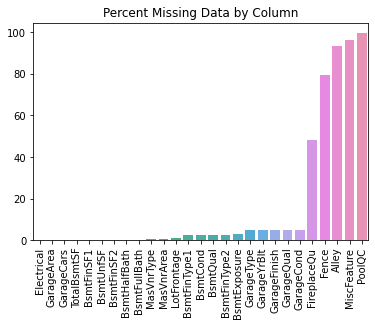

In [18]:
def percent_null(housing):
    percentmis = 100* housing.isnull().sum() / len(housing)
    return percentmis
percentmis=percent_null(house_prices)


percentmis = percentmis[percentmis>0].sort_values()
sns.barplot(x= percentmis.index, y=percentmis).set(title='Percent Missing Data by Column')
plt.xticks(rotation=90)
print(percentmis[percentmis>=20])

In [19]:
house_prices[(house_prices["MSSubClass"] == 85) & (house_prices["Neighborhood"] == "NWAmes")]

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1401,402,527358090,1083,172000,85,RL,NaN,9927,Pave,NaN,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
1641,642,527328010,1102,169000,85,RL,NaN,10464,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1920,104,534127140,1082,162500,85,RL,NaN,8723,Pave,NaN,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal
1943,127,534251030,1320,172500,85,RL,NaN,16500,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal


In [20]:
house_prices.dtypes

Unnamed: 0        int64
PID               int64
GrLivArea         int64
SalePrice         int64
MSSubClass        int64
                  ...  
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Length: 82, dtype: object

In [21]:
house_prices = house_prices[house_prices['LotFrontage'].isnull() == False]
# remove null lot frontage where couldn't interpolate(21 rows)

In [22]:
house_prices['Remodeled'] = (house_prices['YearRemodAdd'] - house_prices['YearBuilt']) > 0
house_prices['Remodeled'] = house_prices['Remodeled'].astype(int)
house_prices.head()
# boolean if house has been remodeled or not

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Remodeled
0,1,909176150,856,126000,30,RL,57.8,7890,Pave,NaN,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,1
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,0
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,1
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,1
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,0


In [23]:
house_prices['BsmtfinSF']= house_prices.TotalBsmtSF - house_prices.BsmtUnfSF
house_prices['BsmtfinSF']

0       238.0
1       945.0
2       737.0
3         0.0
4       643.0
        ...  
2575      0.0
2576      0.0
2577    284.0
2578    841.0
2579    380.0
Name: BsmtfinSF, Length: 2559, dtype: float64

In [24]:
house_prices['Fireplaces'] = house_prices['Fireplaces'] > 0

In [25]:
house_prices['Fireplaces'] = house_prices['Fireplaces'].astype(int)

In [26]:
house_prices['Fireplaces'].value_counts()
# changed fireplaces to present/not

1    1324
0    1235
Name: Fireplaces, dtype: int64

In [27]:
house_prices.shape

(2559, 84)

In [28]:
# columns to drop
#Added Street, Unnamed: 0, and YearRemodAdd to the drop list - CK
drop_list = ['Unnamed: 0','YearRemodAdd','Street','MiscVal', 'PoolArea', 'LowQualFinSF', 'Heating', 'RoofMatl', 'GarageYrBlt', 'FireplaceQu', 'TotalBsmtSF', 'Utilities', 'PoolQC', 'Alley', 'MiscFeature', 'GarageFinish', 'GarageArea', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2']

In [29]:
# dropping columns
house_prices = house_prices.drop(drop_list, axis=1)
house_prices.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtUnfSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'Remodeled', 'BsmtfinSF'],
      dtype='object')

In [30]:
#ADDED: Where did fence thing go I thought we already did this

# house_prices.loc[house_prices["Fence"] == True]

house_prices['Fence'] = house_prices['Fence'].notna().astype(int)
#if you run this line more than once it will mess up fences and make it all 1s so don't run it more than once

In [31]:
#ADDED: 0s and 1s for CentralAir

house_prices['CentralAir'] = [1 if x == 'Y' else 0 if x== 'N' else "NA" for x in house_prices['CentralAir']]

In [32]:
categorical = list(house_prices.columns)
for feature in categorical:
    print(house_prices[feature].value_counts())
    print('')

909276070    2
532351060    1
903456110    1
903202170    1
907253110    1
            ..
528477070    1
535403150    1
527190050    1
528231050    1
533250050    1
Name: PID, Length: 2558, dtype: int64

864     38
1040    25
1092    24
1456    15
1200    14
        ..
2344     1
2338     1
2334     1
2332     1
2049     1
Name: GrLivArea, Length: 1202, dtype: int64

135000    32
140000    28
155000    27
130000    27
145000    23
          ..
274725     1
57625      1
125200     1
112900     1
260116     1
Name: SalePrice, Length: 866, dtype: int64

20     939
60     499
50     257
120    166
30     123
160    119
70     115
80     109
90      87
190     50
85      39
75      19
45      17
180     15
40       5
Name: MSSubClass, dtype: int64

RL         1990
RM          416
FV          113
RH           20
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

60.0     246
80.0     130
70.0     124
50.0     111
75.0      94
        ... 
200.0      1
153.0      1


In [33]:
#ADDED
categorical = list(house_prices.columns)
categorical_vars = []
for feature in categorical:
    if (len(house_prices[feature].value_counts()) > 2) & (len(house_prices[feature].value_counts()) <27):
        categorical_vars.append(feature)
        
len(categorical_vars)

43

In [34]:
#ADDED
#so we have about 43 categorical variables. Oh boy.

#categorical_vars

#how many are ordinal?

In [35]:
#ADDED
for feature in categorical_vars:
    print(house_prices[feature].value_counts())
    print('')
    
ordinal_vars = ['OverallQual','OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',\
               'TotRmsAbvGrd','GarageCars','MoSold']

#will need to dummify nominal_vars
nominal_vars = [x for x in categorical_vars if x not in ordinal_vars]
len(nominal_vars)

20     939
60     499
50     257
120    166
30     123
160    119
70     115
80     109
90      87
190     50
85      39
75      19
45      17
180     15
40       5
Name: MSSubClass, dtype: int64

RL         1990
RM          416
FV          113
RH           20
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

Reg    1634
IR1     841
IR2      71
IR3      13
Name: LotShape, dtype: int64

Lvl    2324
HLS      93
Bnk      92
Low      50
Name: LandContour, dtype: int64

Inside     1871
Corner      435
CulDSac     163
FR2          78
FR3          12
Name: LotConfig, dtype: int64

Gtl    2440
Mod     108
Sev      11
Name: LandSlope, dtype: int64

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NridgHt    121
NWAmes     117
SawyerW    113
Mitchel    103
BrkSide    101
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      53
StoneBr     43
SWISU       42
ClearCr     35
MeadowV     34
BrDale      29
Blmngtn  

32

In [36]:
#feature engineer: liveable basement?

#paved drive: change to fully paved vs not fully paved?
#Fence... I thought we changed that
#condition/qual-- do we want to make those ordinal?
#What about YrSold??

In [37]:
#ADDED
bsmt = [x for x in house_prices.columns if 'Bsmt' in x]
bsmt

# for feature in bsmt:
#     print(house_prices[feature].value_counts())
    
# #What are my qualifications for a liveable basement? "Bonus Room
# #https://www.thegreategressco.com/pages/iowa-egress-requirements looked up iowa egress rules lol
# acceptable = ['Ex', 'Gd', 'TA', 'Fa', 'Av', 'Mn']
# BsmtfinSF > 200, BsmtQual in acceptable, BsmtCond != No, 
#hm or just could have done BsmtFinType1 or BsmtFinType2 in ['GLQ', 'ALQ', 'BLQ']
#idk.

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtUnfSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtfinSF']

In [38]:
#I need to do something about the cols with NAn
house_prices[nominal_vars].isna().sum()[house_prices.isna().sum() > 0]



#here is a manual list cuz it was taking forever:

nominal_nans = ["MasVnrType","BsmtQual","BsmtCond","BsmtExposure","Electrical","GarageType","GarageQual","GarageCond"]

#Method 2: Replace NaN Values with String in Specific Columns df[['col1', 'col2']] = df[['col1','col2']]. fillna('')


for var in nominal_nans:
    house_prices[var] = house_prices[var].fillna('NA')


In [51]:
#Ok I guess I will try to dummify
dummified = house_prices.copy()

for var in nominal_vars:
    
    dumbo = pd.get_dummies(house_prices[var], prefix = var, prefix_sep='__')
    dumbo = dumbo.drop(var + '__' + str(house_prices[var].mode()[0]), axis=1)
    dummified = pd.concat([dummified.drop(var, axis=1), dumbo], axis=1)

#So i think I will actually have to do this by splitting up nominal_vars that have NANs or not? dummy_na = True as a 
#setting in get_dummies????

In [52]:
pd.set_option('max_columns', None)
dummified

,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,Remodeled,BsmtfinSF,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,MSZoning__A (agr),MSZoning__C (all),MSZoning__FV,MSZoning__I (all),MSZoning__RH,MSZoning__RM,LotShape__IR1,LotShape__IR2,LotShape__IR3,LandContour__Bnk,LandContour__HLS,LandContour__Low,LotConfig__Corner,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LandSlope__Mod,LandSlope__Sev,Neighborhood__Blmngtn,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__Greens,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,Condition1__Artery,Condition1__Feedr,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,Condition2__Artery,Condition2__Feedr,Condition2__PosA,Condition2__PosN,Condition2__RRAe,Condition2__RRAn,Condition2__RRNn,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Fin,HouseStyle__1.5Unf,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Flat,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,Exterior1st__AsbShng,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__PreCast,Exterior1st__Stucco,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsbShng,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Plywood,Exterior2nd__PreCast,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__BrkCmn,MasVnrType__BrkFace,MasVnrType__NA,MasVnrType__Stone,ExterQual__Ex,ExterQual__Fa,ExterQual__Gd,ExterCond__Ex,ExterCond__Fa,ExterCond__Gd,ExterCond__Po,Foundation__BrkTil,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtQual__Ex,BsmtQual__Fa,BsmtQual__Gd,BsmtQual__NA,BsmtQual__Po,BsmtCond__Ex,BsmtCond__Fa,BsmtCond__Gd,BsmtCond__NA,BsmtCond__Po,BsmtExposure__Av,BsmtExposure__Gd,BsmtExposure__Mn,BsmtExposure__NA,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,Electrical__FuseA,Electrical__FuseF,Electrical__FuseP,Electrical__NA,KitchenQual__Ex,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__Po,Functional__Maj1,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sal,GarageType__2Types,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__NA,GarageQual__Ex,GarageQual__Fa,GarageQual__Gd,GarageQual__NA,GarageQual__Po,GarageCond__Ex,GarageCond__Fa,GarageCond__Gd,GarageCond__NA,GarageCond__Po,PavedDrive__N,PavedDrive__P,YrSold__2006,YrSold__2008,YrSold__2009,YrSold__2010,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__VWD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
0,909176150,856,126000,57.800000,7890,6,6,1939,0.0,618.0,1,856,0,1.0,0.0,1,0,2,1,4,1,2.0,0,0,0,0,166,0,3,1,238.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [53]:
dummy_count = 0
for var in nominal_vars:
    dummy_count += len(house_prices[var].value_counts()) - 1
    
dummy_count
#I think this tracks with how many cols there now are more or less.
#How do you keep track though of what you dropped when you dummified?
#do we need subclass AND zoning? or does one take care of the other

201

In [54]:
dummified['PID'].nunique()
#I gues there's one duplicate we should remove?

dummified.groupby('PID').count().sort_values(by="GrLivArea", ascending = False)

dummified[dummified['PID']== 909276070]

,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,Remodeled,BsmtfinSF,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,MSZoning__A (agr),MSZoning__C (all),MSZoning__FV,MSZoning__I (all),MSZoning__RH,MSZoning__RM,LotShape__IR1,LotShape__IR2,LotShape__IR3,LandContour__Bnk,LandContour__HLS,LandContour__Low,LotConfig__Corner,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LandSlope__Mod,LandSlope__Sev,Neighborhood__Blmngtn,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__Greens,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,Condition1__Artery,Condition1__Feedr,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,Condition2__Artery,Condition2__Feedr,Condition2__PosA,Condition2__PosN,Condition2__RRAe,Condition2__RRAn,Condition2__RRNn,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Fin,HouseStyle__1.5Unf,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Flat,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,Exterior1st__AsbShng,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__PreCast,Exterior1st__Stucco,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsbShng,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Plywood,Exterior2nd__PreCast,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__BrkCmn,MasVnrType__BrkFace,MasVnrType__NA,MasVnrType__Stone,ExterQual__Ex,ExterQual__Fa,ExterQual__Gd,ExterCond__Ex,ExterCond__Fa,ExterCond__Gd,ExterCond__Po,Foundation__BrkTil,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtQual__Ex,BsmtQual__Fa,BsmtQual__Gd,BsmtQual__NA,BsmtQual__Po,BsmtCond__Ex,BsmtCond__Fa,BsmtCond__Gd,BsmtCond__NA,BsmtCond__Po,BsmtExposure__Av,BsmtExposure__Gd,BsmtExposure__Mn,BsmtExposure__NA,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,Electrical__FuseA,Electrical__FuseF,Electrical__FuseP,Electrical__NA,KitchenQual__Ex,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__Po,Functional__Maj1,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sal,GarageType__2Types,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__NA,GarageQual__Ex,GarageQual__Fa,GarageQual__Gd,GarageQual__NA,GarageQual__Po,GarageCond__Ex,GarageCond__Fa,GarageCond__Gd,GarageCond__NA,GarageCond__Po,PavedDrive__N,PavedDrive__P,YrSold__2006,YrSold__2008,YrSold__2009,YrSold__2010,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__VWD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
1816,909276070,1717,194000,80.0,12400,5,6,1940,0.0,299.0,1,1125,592,0.0,0.0,1,1,2,1,7,1,1.0,0,0,0,0,113,0,2,1,602.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [55]:
#dropping duplicate row
dummified = dummified.drop_duplicates(subset='PID', keep='first', inplace=False, ignore_index=False)

In [56]:
dummified.columns[dummified.isnull().any()]

Index(['MasVnrArea', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars',
       'BsmtfinSF'],
      dtype='object')

In [57]:
dummified = dummified.dropna()

In [58]:
saleprice = dummified['SalePrice']

In [60]:
#dropping PID and SalePrice cols from x data for analysis
dummified = dummified.drop(['PID', 'SalePrice'], axis=1)

In [49]:
dummified = dummified.dropna()

In [89]:
dummified

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,Remodeled,BsmtfinSF,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,MSZoning__A (agr),MSZoning__C (all),MSZoning__FV,MSZoning__I (all),MSZoning__RH,MSZoning__RM,LotShape__IR1,LotShape__IR2,LotShape__IR3,LandContour__Bnk,LandContour__HLS,LandContour__Low,LotConfig__Corner,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LandSlope__Mod,LandSlope__Sev,Neighborhood__Blmngtn,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__Greens,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,Condition1__Artery,Condition1__Feedr,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,Condition2__Artery,Condition2__Feedr,Condition2__PosA,Condition2__PosN,Condition2__RRAe,Condition2__RRAn,Condition2__RRNn,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Fin,HouseStyle__1.5Unf,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Flat,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,Exterior1st__AsbShng,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__PreCast,Exterior1st__Stucco,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsbShng,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Plywood,Exterior2nd__PreCast,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__BrkCmn,MasVnrType__BrkFace,MasVnrType__NA,MasVnrType__Stone,ExterQual__Ex,ExterQual__Fa,ExterQual__Gd,ExterCond__Ex,ExterCond__Fa,ExterCond__Gd,ExterCond__Po,Foundation__BrkTil,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtQual__Ex,BsmtQual__Fa,BsmtQual__Gd,BsmtQual__NA,BsmtQual__Po,BsmtCond__Ex,BsmtCond__Fa,BsmtCond__Gd,BsmtCond__NA,BsmtCond__Po,BsmtExposure__Av,BsmtExposure__Gd,BsmtExposure__Mn,BsmtExposure__NA,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,Electrical__FuseA,Electrical__FuseF,Electrical__FuseP,Electrical__NA,KitchenQual__Ex,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__Po,Functional__Maj1,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sal,GarageType__2Types,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__NA,GarageQual__Ex,GarageQual__Fa,GarageQual__Gd,GarageQual__NA,GarageQual__Po,GarageCond__Ex,GarageCond__Fa,GarageCond__Gd,GarageCond__NA,GarageCond__Po,PavedDrive__N,PavedDrive__P,YrSold__2006,YrSold__2008,YrSold__2009,YrSold__2010,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__VWD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
0,856,57.800000,7890,6,6,1939,0.0,618.0,1,856,0,1.0,0.0,1,0,2,1,4,1,2.0,0,0,0,0,166,0,3,1,238.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,


# Split

In [61]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(dummified, saleprice, test_size=0.2, random_state=42)

In [62]:
X_train

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,Remodeled,BsmtfinSF,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,MSZoning__A (agr),MSZoning__C (all),MSZoning__FV,MSZoning__I (all),MSZoning__RH,MSZoning__RM,LotShape__IR1,LotShape__IR2,LotShape__IR3,LandContour__Bnk,LandContour__HLS,LandContour__Low,LotConfig__Corner,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LandSlope__Mod,LandSlope__Sev,Neighborhood__Blmngtn,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__Greens,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,Condition1__Artery,Condition1__Feedr,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,Condition2__Artery,Condition2__Feedr,Condition2__PosA,Condition2__PosN,Condition2__RRAe,Condition2__RRAn,Condition2__RRNn,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Fin,HouseStyle__1.5Unf,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Flat,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,Exterior1st__AsbShng,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__PreCast,Exterior1st__Stucco,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsbShng,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Plywood,Exterior2nd__PreCast,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__BrkCmn,MasVnrType__BrkFace,MasVnrType__NA,MasVnrType__Stone,ExterQual__Ex,ExterQual__Fa,ExterQual__Gd,ExterCond__Ex,ExterCond__Fa,ExterCond__Gd,ExterCond__Po,Foundation__BrkTil,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtQual__Ex,BsmtQual__Fa,BsmtQual__Gd,BsmtQual__NA,BsmtQual__Po,BsmtCond__Ex,BsmtCond__Fa,BsmtCond__Gd,BsmtCond__NA,BsmtCond__Po,BsmtExposure__Av,BsmtExposure__Gd,BsmtExposure__Mn,BsmtExposure__NA,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,Electrical__FuseA,Electrical__FuseF,Electrical__FuseP,Electrical__NA,KitchenQual__Ex,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__Po,Functional__Maj1,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sal,GarageType__2Types,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__NA,GarageQual__Ex,GarageQual__Fa,GarageQual__Gd,GarageQual__NA,GarageQual__Po,GarageCond__Ex,GarageCond__Fa,GarageCond__Gd,GarageCond__NA,GarageCond__Po,PavedDrive__N,PavedDrive__P,YrSold__2006,YrSold__2008,YrSold__2009,YrSold__2010,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__VWD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
1575,1040,74.0,8544,3,4,1949,340.0,0.0,0,1040,0,0.0,0.0,2,0,2,2,6,0,2.0,0,0,0,0,0,0,5,1,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

# Linear Regression

In [63]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [110]:
y_train

1575     87500
1679    136000
2344    218000
812     136500
885     195500
         ...  
1664    152000
1112    555000
1147    190000
1313    156000
872     149350
Name: SalePrice, Length: 2032, dtype: int64

In [64]:
y_prediction =  LR.predict(X_test)
y_prediction

array([ 85667.75834375, 230912.47455394, 122853.00643305, 261349.61200238,
       250588.47834391, 119360.14501926,  95340.46777685, 218510.42721015,
       138736.61184789, 202824.7080421 , 279830.45050034, 201940.5383339 ,
       114269.96942878, 116969.59504005, 191712.43960954, 283877.65663566,
       146062.84379151, 197395.12178952, 163134.07731383, 182158.40458278,
       157949.93044037, 490298.69664525, 286235.44195091, 250392.63475427,
       160149.11930549, 114752.44864229, 176658.16281748, 138776.11994263,
       194341.20596751,  94172.44875088, 241319.41391549, 223066.80654784,
       231507.68989156, 160962.61347582, 208572.36115168, 151965.69974669,
       126199.80380134, 189870.82060906, 127791.84047236, 200532.85793852,
       189627.16022169, 137472.02384866, 180439.86095229, 157580.7274461 ,
       177528.65550786, 210902.85820413, 151739.41978061, 319622.62483862,
       143514.43341577, 183331.97013683, 269764.53229103, 397826.68895154,
       123285.29261385, 1

In [109]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is =',score)
print('mean_sqrd_error is =',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is =',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is = 0.924787568529889
mean_sqrd_error is = 428249072.0480554
root_mean_squared error of is = 20694.17966598472


In [74]:
print('the MLR intercept is: %.2f' %(LR.intercept_))
pd.Series(LR.coef_, index=X_train.columns)

the MLR intercept is: -890586.38


GrLivArea                    41.798644
LotFrontage                 -70.582737
LotArea                       0.837890
OverallQual                6838.065650
OverallCond                5537.201646
                              ...     
SaleCondition__Abnorml    -6642.720315
SaleCondition__AdjLand    -3540.285709
SaleCondition__Alloca     12991.156173
SaleCondition__Family     -9896.885502
SaleCondition__Partial    12941.182739
Length: 230, dtype: float64

In [101]:
LR.coef_

array([ 4.17986437e+01, -7.05827365e+01,  8.37889734e-01,  6.83806565e+03,
        5.53720165e+03,  4.47005292e+02,  2.83816828e+01,  1.70662117e+01,
       -6.11087142e+02,  1.56252846e+01,  2.42976260e+01,  1.28846960e+03,
        1.14502028e+03, -1.72428208e+02,  1.42425953e+03, -5.05555764e+03,
       -1.14189900e+04,  4.53315174e+02,  2.52143419e+03,  8.00173639e+03,
        4.91099171e+00, -3.65398913e+00,  1.03201907e+01, -3.78330154e+00,
        3.84409159e+01,  9.99624226e+02, -1.90397748e+02,  1.59978905e+03,
        3.49575767e+01,  3.17912851e+03,  8.00751616e+03,  1.46183455e+03,
        5.16574739e+03, -3.65196108e+03,  6.49165783e+03,  1.11823140e+04,
       -9.33492015e+03, -2.15500902e+03, -6.45935228e+03, -9.06933651e+03,
       -1.58216175e+04, -9.21185265e+03, -1.03214339e+04,  2.61601212e+03,
       -1.59113752e+04, -1.31449192e+04, -9.43349635e+03,  6.52303354e+03,
       -7.92635875e+03, -1.50889231e+03,  6.46408617e+02, -6.57155698e+03,
       -8.03890845e+03,  

In [90]:
import statsmodels.api as sm
from scipy import stats

In [91]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     118.1
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        12:34:36   Log-Likelihood:                -22913.
No. Observations:                2032   AIC:                         4.627e+04
Df Residuals:                    1809   BIC:                         4.752e+04
Df Model:                         222                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -8.90

In [98]:
rm_pvalues = est2.pvalues[est2.pvalues > 0.05]
rm_pvalues

CentralAir                0.828032
1stFlrSF                  0.201725
BsmtFullBath              0.344195
BsmtHalfBath              0.584046
FullBath                  0.912686
                            ...   
SaleCondition__Abnorml    0.059974
SaleCondition__AdjLand    0.879935
SaleCondition__Alloca     0.400307
SaleCondition__Family     0.132038
SaleCondition__Partial    0.308802
Length: 155, dtype: float64

In [99]:
strong_pvalues = est2.pvalues[est2.pvalues < 0.05]
strong_pvalues

const             4.973016e-13
GrLivArea         5.416303e-04
LotFrontage       4.560382e-02
LotArea           7.507600e-19
OverallQual       2.296588e-20
                      ...     
GarageQual__Ex    3.009096e-08
GarageQual__Gd    3.070378e-04
GarageCond__Ex    8.440769e-06
YrSold__2006      2.932989e-02
SaleType__Con     2.197479e-02
Length: 76, dtype: float64

In [ ]:
int_df.drop(columns=rm_pvalues.index, inplace=True)

In [95]:
est2.pvalues.count()

231

In [97]:
(est2.pvalues < 0.05).sum()

76

# Ridge

In [69]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [70]:
ridge = Ridge()

In [71]:
ridge.fit(X_train, y_train)

Ridge()

In [73]:
print('the ridge intercept is: %.2f' %(ridge.intercept_))
pd.Series(ridge.coef_, index=X_train.columns)

the ridge intercept is: -891065.08


GrLivArea                    44.387755
LotFrontage                 -65.835997
LotArea                       0.819149
OverallQual                7392.515235
OverallCond                5582.086815
                              ...     
SaleCondition__Abnorml    -7168.242655
SaleCondition__AdjLand    -2137.111354
SaleCondition__Alloca      8191.254420
SaleCondition__Family     -9681.543463
SaleCondition__Partial    10136.630412
Length: 230, dtype: float64

In [76]:
alphas = np.arange(0,20)
ridge.set_params(normalize=True)
coefs  = []
scores = []
for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(X_train, y_train)  
        coefs.append(ridge.coef_)
        scores.append(ridge.score(X_train, y_train))
coefs = pd.DataFrame(coefs, index = alphas, columns = X_train.columns)  
coefs.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,Remodeled,BsmtfinSF,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,MSZoning__A (agr),MSZoning__C (all),MSZoning__FV,MSZoning__I (all),MSZoning__RH,MSZoning__RM,LotShape__IR1,LotShape__IR2,LotShape__IR3,LandContour__Bnk,LandContour__HLS,LandContour__Low,LotConfig__Corner,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LandSlope__Mod,LandSlope__Sev,Neighborhood__Blmngtn,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__Greens,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,Condition1__Artery,Condition1__Feedr,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,Condition2__Artery,Condition2__Feedr,Condition2__PosA,Condition2__PosN,Condition2__RRAe,Condition2__RRAn,Condition2__RRNn,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Fin,HouseStyle__1.5Unf,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Flat,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,Exterior1st__AsbShng,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__PreCast,Exterior1st__Stucco,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsbShng,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Plywood,Exterior2nd__PreCast,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__BrkCmn,MasVnrType__BrkFace,MasVnrType__NA,MasVnrType__Stone,ExterQual__Ex,ExterQual__Fa,ExterQual__Gd,ExterCond__Ex,ExterCond__Fa,ExterCond__Gd,ExterCond__Po,Foundation__BrkTil,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtQual__Ex,BsmtQual__Fa,BsmtQual__Gd,BsmtQual__NA,BsmtQual__Po,BsmtCond__Ex,BsmtCond__Fa,BsmtCond__Gd,BsmtCond__NA,BsmtCond__Po,BsmtExposure__Av,BsmtExposure__Gd,BsmtExposure__Mn,BsmtExposure__NA,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,Electrical__FuseA,Electrical__FuseF,Electrical__FuseP,Electrical__NA,KitchenQual__Ex,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__Po,Functional__Maj1,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sal,GarageType__2Types,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__NA,GarageQual__Ex,GarageQual__Fa,GarageQual__Gd,GarageQual__NA,GarageQual__Po,GarageCond__Ex,GarageCond__Fa,GarageCond__Gd,GarageCond__NA,GarageCond__Po,PavedDrive__N,PavedDrive__P,YrSold__2006,YrSold__2008,YrSold__2009,YrSold__2010,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__VWD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
0,41.495680,-70.990827,0.841707,6873.252473,5555.476614,445.942981,28.279980,16.882106,-707.806643,16.048906,24.562328,1304.354569,1150.514276,-186.471845,1438.734382,-

Text(0, 0.5, '$R^2$')

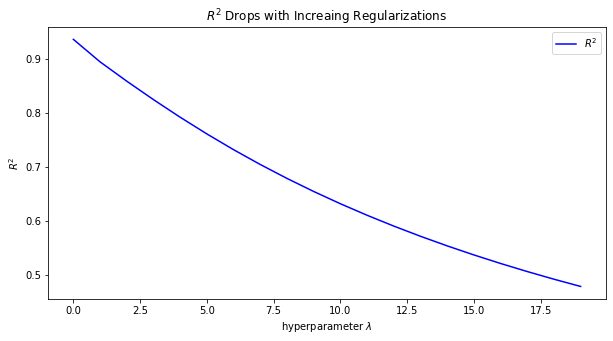

In [78]:
plt.plot(alphas, scores, c='b', label=r'$R^2$')
plt.legend(loc=1)
plt.title(r'$R^2$ Drops with Increaing Regularizations')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

# Lasso

In [79]:
lasso  = Lasso()
alphas = np.linspace(0.1,20.1,20)
lasso.set_params(normalize=False)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train, y_train)  
        coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)  
coefs_lasso.head()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 370773937991.48816, tolerance: 1147160735.0505376
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374960391230.86847, tolerance: 1147160735.0505376
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378743810266.32495, tolerance: 1147160735.0505376
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Convergence

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,Remodeled,BsmtfinSF,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,MSZoning__A (agr),MSZoning__C (all),MSZoning__FV,MSZoning__I (all),MSZoning__RH,MSZoning__RM,LotShape__IR1,LotShape__IR2,LotShape__IR3,LandContour__Bnk,LandContour__HLS,LandContour__Low,LotConfig__Corner,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LandSlope__Mod,LandSlope__Sev,Neighborhood__Blmngtn,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__Greens,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,Condition1__Artery,Condition1__Feedr,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,Condition2__Artery,Condition2__Feedr,Condition2__PosA,Condition2__PosN,Condition2__RRAe,Condition2__RRAn,Condition2__RRNn,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Fin,HouseStyle__1.5Unf,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Flat,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,Exterior1st__AsbShng,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__PreCast,Exterior1st__Stucco,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsbShng,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Plywood,Exterior2nd__PreCast,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__BrkCmn,MasVnrType__BrkFace,MasVnrType__NA,MasVnrType__Stone,ExterQual__Ex,ExterQual__Fa,ExterQual__Gd,ExterCond__Ex,ExterCond__Fa,ExterCond__Gd,ExterCond__Po,Foundation__BrkTil,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtQual__Ex,BsmtQual__Fa,BsmtQual__Gd,BsmtQual__NA,BsmtQual__Po,BsmtCond__Ex,BsmtCond__Fa,BsmtCond__Gd,BsmtCond__NA,BsmtCond__Po,BsmtExposure__Av,BsmtExposure__Gd,BsmtExposure__Mn,BsmtExposure__NA,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,Electrical__FuseA,Electrical__FuseF,Electrical__FuseP,Electrical__NA,KitchenQual__Ex,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__Po,Functional__Maj1,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sal,GarageType__2Types,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__NA,GarageQual__Ex,GarageQual__Fa,GarageQual__Gd,GarageQual__NA,GarageQual__Po,GarageCond__Ex,GarageCond__Fa,GarageCond__Gd,GarageCond__NA,GarageCond__Po,PavedDrive__N,PavedDrive__P,YrSold__2006,YrSold__2008,YrSold__2009,YrSold__2010,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__VWD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
0.100000,41.972019,-70.381251,0.837775,6844.727548,5537.729509,447.307708,28.381657,17.056144,-624.817127,15.459706,24.136944,1283.779042,1132.760318,-174.294050,1420.2

# Elastic Net

Text(0, 0.5, 'slope values')

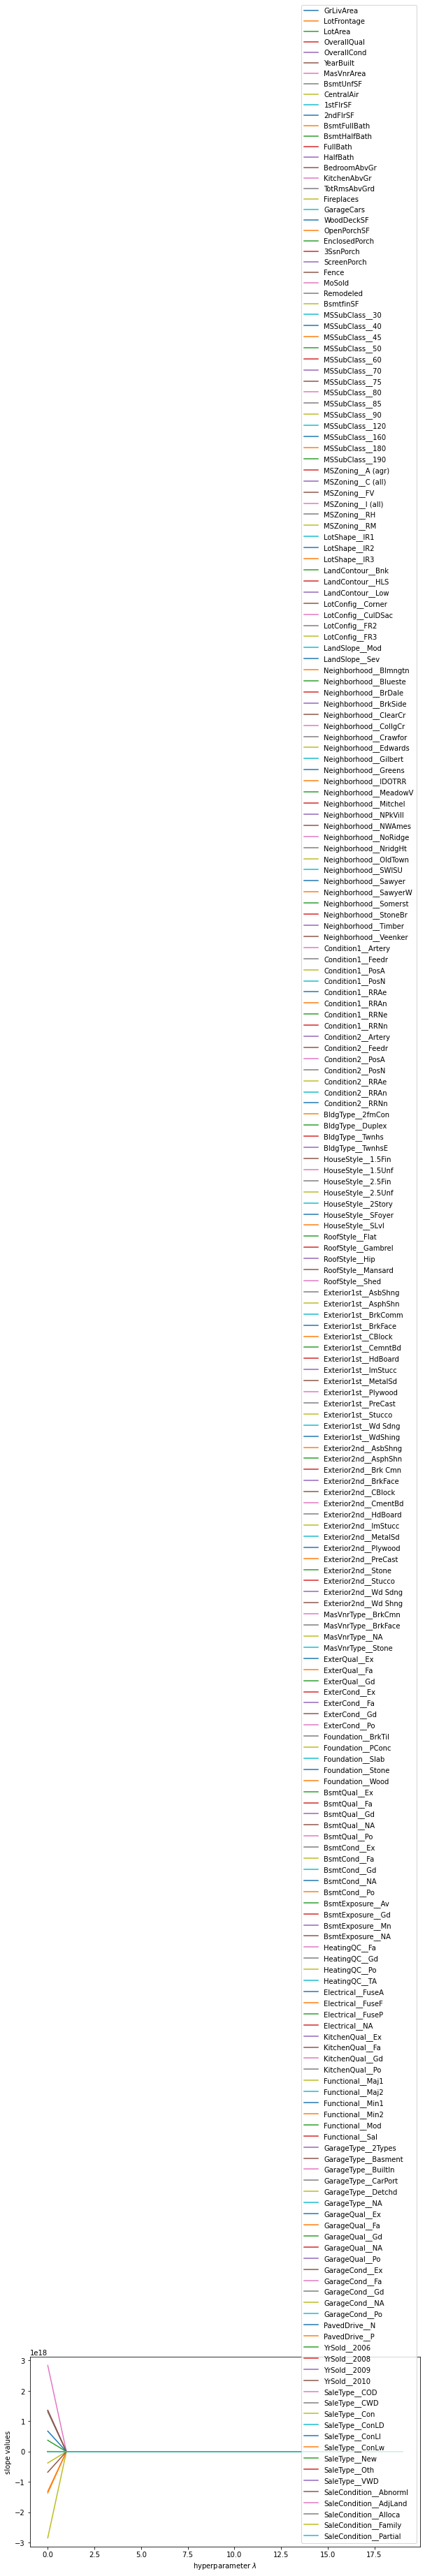

In [77]:
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.columns:
    plt.plot(coefs.index, coefs[name], label=name)
plt.legend(loc=4)   
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

In [81]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5, normalize=False)
elasticnet.fit(X_train, y_train)
print(r'The R^2 is %.2f' %(elasticnet.score(X_train, y_train)))
elasticnet.coef_,  elasticnet.intercept_

The R^2 is 0.91


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604457986042.2759, tolerance: 1147160735.0505376
  model = cd_fast.enet_coordinate_descent(


(array([ 4.30026987e+01,  6.16811600e+01,  7.06516406e-01,  1.14203412e+04,
         5.86749867e+03,  4.77982405e+02,  3.71142227e+01,  2.01214214e+01,
        -1.46516127e+03,  1.60982420e+01,  1.87881640e+01,  6.49267813e+02,
        -2.66191409e+02, -8.61239889e+02,  6.43114596e+02, -6.33786720e+03,
        -5.02662594e+03,  1.40081949e+02,  2.77717804e+03,  7.19155901e+03,
         1.26917116e+01, -4.35460286e+00,  1.37658145e+01, -1.28841069e+00,
         5.65120701e+01, -7.49160515e+02, -2.82277621e+02,  1.38049703e+03,
         3.82357078e+01,  3.26931503e+03, -2.06073483e+01,  3.13676285e+02,
        -1.23485101e+02,  1.24119580e+02,  1.99008881e+03,  1.15982569e+03,
        -8.43274424e+02,  9.65449195e+02, -3.91172329e+03, -3.56387534e+03,
        -4.89344570e+03,  2.25585740e+02, -8.84553891e+02,  3.55185802e+01,
        -3.55177428e+02,  1.04005217e+03, -1.05475631e+02, -2.83994528e+02,
        -5.07701240e+03,  1.15981431e+02,  1.98038106e+03, -1.28938466e+03,
        -4.2

In [85]:
ridge.set_params(normalize=True)
lasso.set_params(normalize=True)
ridge_scores_train = []
lasso_scores_train = []
ridge_scores_test  = []
lasso_scores_test  = []

alphas = np.linspace(0.01, 1, 100)

for alpha in alphas:
            ridge.set_params(alpha=alpha)
            lasso.set_params(alpha=alpha)
            ridge.fit(X_train, y_train)
            lasso.fit(X_train, y_train)
            ridge_scores_train.append(ridge.score(X_train, y_train))
            ridge_scores_test.append(ridge.score(X_test, y_test))
            lasso_scores_train.append(lasso.score(X_train, y_train))
            lasso_scores_test.append(lasso.score(X_test, y_test))
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29420962893.8407, tolerance: 1147160735.0505376
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9780685563.518188, tolerance: 1147160735.0505376
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4809181706.614868, tolerance: 1147160735.0505376
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarn

Text(0, 0.5, '$R^2$')

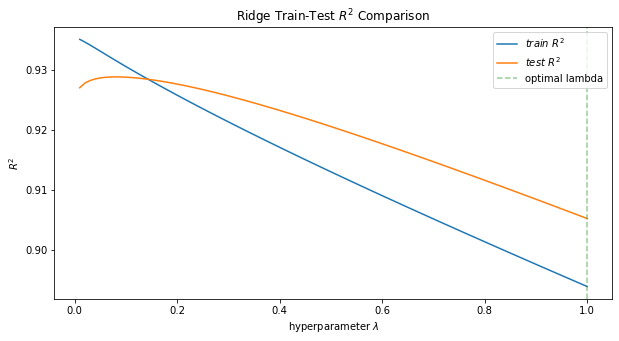

In [86]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge Train-Test $R^2$ Comparison')
ridge_underfit = ridge_scores_train < ridge_scores_test
last_underfit  = np.max(alphas[ridge_underfit])
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')